In [1]:
import matplotlib as mpl 
mpl.use("pgf") 
pgf_with_rc_fonts = {
    "font.serif": [],
}

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['axes.facecolor'] = 'w'

In [2]:
import os
import sys

pardir = os.path.abspath(os.pardir)
sys.path.append(pardir)

In [3]:
%load_ext autoreload
%autoreload 2
from experiment import Runner

In [4]:
exp_click = Runner(dataset='click', params={})

[31466] [exp] click | n_epoch = 1
[31466] [exp] n_sample = 3570; 714 (20%) + 357 (10%) + 2499 (70%)
[31466] [exp] n_user = 3570, n_item = 5


In [5]:
exp_ML100k = Runner(dataset='ML100k', params={})

[31466] [exp] ML100k | n_epoch = 1
[31466] [exp] n_sample = 21201; 4240 (20%) + 2120 (10%) + 14841 (70%)
[31466] [exp] n_user = 928, n_item = 1172


In [215]:
exp_ML1M = Runner(dataset='ML1M', params={})

[31466] [exp] ML1M | n_epoch = 1
[31466] [exp] n_sample = 226310; 45262 (20%) + 22631 (10%) + 158417 (70%)
[31466] [exp] n_user = 6014, n_item = 3232


### prepare

In [218]:
# http://public.tableau.com/profile/chris.gerrard#!/vizhome/TableauColors/ColorPaletteswithRGBValues
colors = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
          (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
          (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),   
          (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
          (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# [0, 255] -> [0.0, 1.0]
for i, (r, g, b) in enumerate(colors):  
    colors[i] = (r / 255., g / 255., b / 255.) 
    
colors_medium = [(114, 158, 206), (255, 158, 74), (103, 191, 92),
                 (237, 102, 93), (173, 139, 201), (168, 120, 110),
                 (237, 151, 202), (162, 162, 162), (205, 204, 93), (109, 204, 218)]

for i, (r, g, b) in enumerate(colors_medium):  
    colors_medium[i] = (r / 255., g / 255., b / 255.) 

In [104]:
def show_result(path, at, n_item):
    res = parse_result(path, window_size=500, n_item=n_item, at=at)

    # plt.subplot(122)
    plt.hist(res['top1_scores'], bins=16, 
             weights=(np.zeros_like(res['top1_scores']) + 1. / len(res['top1_scores']))*100, 
             facecolor='g', alpha=0.75)
    
    ax = plt.gca()
    ax.set_xlabel('top-1 score')
    ax.set_ylabel('percentage of items')
    ax.yaxis.grid()

    fig = plt.gcf()
    fig.set_size_inches((5.5, 3))

    # print('recall: %.5f' % res['recall'])
    # print('MPR: %.5f' % res['MPR'])
    print('Recommend: %.5f sec' % res['avg_recommend'])
    print('Update: %.5f sec' % res['avg_update'])
    
    return res['top1_scores']

In [106]:
from tool.parse_result import parse_result

## Synthetic click

Recommend: 0.00001 sec
Update: 0.00000 sec


array([  612.,   613.,   614., ...,  1164.,  1164.,  1164.])

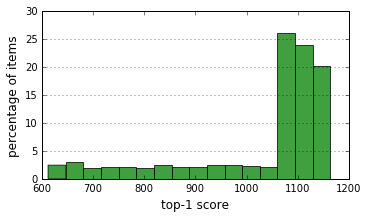

In [107]:
show_result('../results/chiir-2017/click/popular.tsv', at=1, n_item=5)

Recommend: 0.00002 sec
Update: 0.00003 sec


array([ 0.01078047,  0.01075307,  0.01072571, ...,  0.00962273,
        0.00959614,  0.00964707])

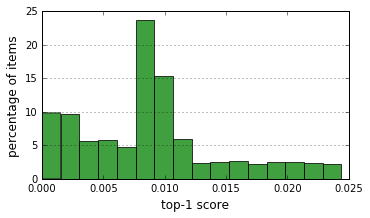

In [111]:
show_result('../results/chiir-2017/click/iMF.tsv', at=1, n_item=5)

recall: 0.29612
MPR: 34.07363
Recommend: 0.00321 sec
Update: 0.00026 sec


array([ 0.0214836 ,  0.05771845,  0.07493145, ...,  0.00606674,
        0.04001218,  0.01108384])

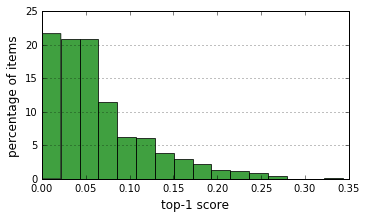

In [27]:
show_result('../results/chiir-2017/click/iFMs.tsv', at=1, n_item=5)

recall: 0.30092
MPR: 27.29092
Recommend: 0.00190 sec
Update: 0.00066 sec


array([ 0.59204824,  0.52874531,  0.65766699, ...,  0.64992995,
        0.54147438,  0.70351509])

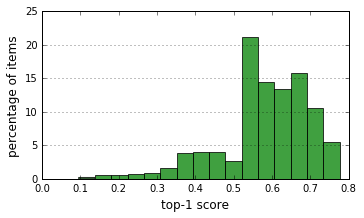

In [28]:
show_result('../results/chiir-2017/click/sketch/ell_7.tsv', at=1, n_item=5)

## ML100k

recall: 0.10538
MPR: 17.10795
Recommend: 0.00006 sec
Update: 0.00000 sec


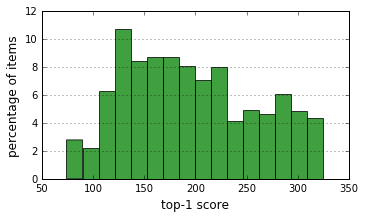

In [12]:
top1_popular = show_result('../results/chiir-2017/ML100k/popular.tsv', at=10, n_item=1172)

recall: 0.02318
MPR: 40.91159
Recommend: 0.00017 sec
Update: 0.00003 sec


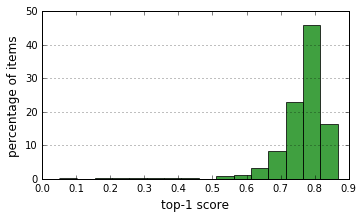

In [13]:
top1_iMF = show_result('../results/chiir-2017/ML100k/iMF.tsv', at=10, n_item=1172)

recall: 0.03349
MPR: 27.51833
Recommend: 0.02388 sec
Update: 0.00142 sec


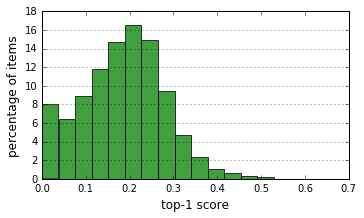

In [14]:
top1_iFMs = show_result('../results/chiir-2017/ML100k/iFMs.tsv', at=10, n_item=1172)

recall: 0.03005
MPR: 40.72182
Recommend: 0.00650 sec
Update: 0.00039 sec


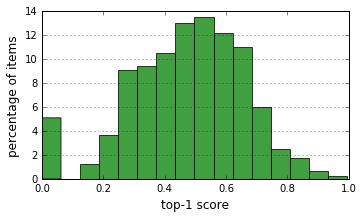

In [15]:
top1_sketch = show_result('../results/chiir-2017/ML100k/sketch/ell_1.tsv', at=10, n_item=1172)

## ML1M

recall: 0.08454
MPR: 12.14989
Recommend: 0.00018 sec
Update: 0.00000 sec


array([  596.,   596.,   596., ...,  1963.,  1963.,  1963.])

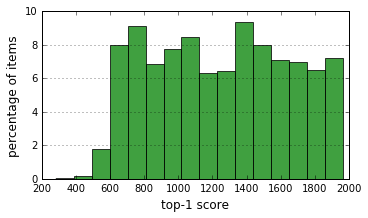

In [33]:
show_result('../results/chiir-2017/ML1M/popular.tsv', at=10, n_item=3232)

recall: 0.01249
MPR: 42.18032
Recommend: 0.00061 sec
Update: 0.00003 sec


array([ 0.80032402,  0.80108878,  0.80069313, ...,  0.76357141,
        0.45563701,  0.70656217])

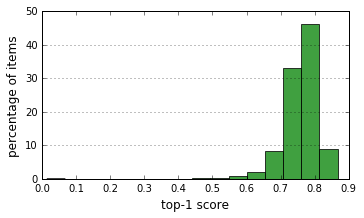

In [34]:
show_result('../results/chiir-2017/ML1M/iMF.tsv', at=10, n_item=3232)

recall: 0.01379
MPR: 27.84364
Recommend: 0.30973 sec
Update: 0.00605 sec


array([ 0.15428881,  0.1055884 ,  0.08894   , ...,  0.26724235,
        0.05827789,  0.26528091])

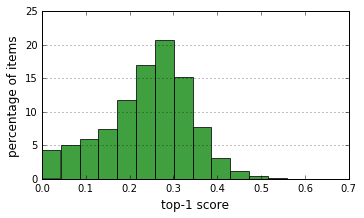

In [35]:
show_result('../results/chiir-2017/ML1M/iFMs.tsv', at=10, n_item=3232)

recall: 0.02451
MPR: 37.67139
Recommend: 0.01626 sec
Update: 0.00044 sec


array([ 0.84946507,  0.2773501 ,  0.45812285, ...,  0.30151134,
        0.72409454,  0.91142078])

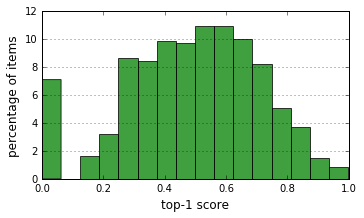

In [36]:
show_result('../results/chiir-2017/ML1M/sketch.tsv', at=10, n_item=3232)

## Experiment on different "@"

### Click

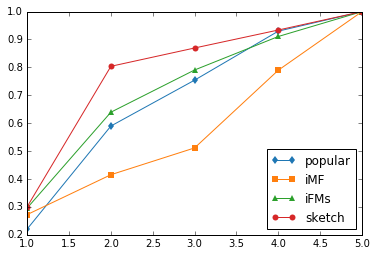

In [231]:
popular = []
iMF = []
iFMs = []
sketch = []

at_max = 5
n_item = 5

for at in range(1, at_max + 1):
    res = parse_result('../results/chiir-2017/click/popular.tsv', window_size=3000, at=at, n_item=n_item)
    popular.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/click/iMF.tsv', window_size=3000, at=at, n_item=n_item)
    iMF.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/click/iFMs.tsv', window_size=3000, at=at, n_item=n_item)
    iFMs.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/click/sketch/ell_7.tsv', window_size=3000, at=at, n_item=n_item)
    sketch.append(res['recall'])
    
plt.plot(range(1, at_max + 1), popular, c=colors[0], marker='d', mew=0.0, label='popular')
plt.plot(range(1, at_max + 1), iMF, c=colors[2], marker='s', mew=0.0, label='iMF')
plt.plot(range(1, at_max + 1), iFMs, c=colors[4], marker='^', mew=0.0, label='iFMs')
plt.plot(range(1, at_max + 1), sketch, c=colors[6], marker='o', mew=0.0, label='sketch')

plt.legend(loc=4)

### ML100k

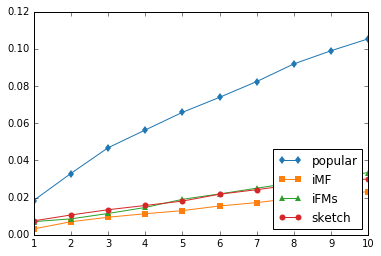

In [232]:
popular = []
iMF = []
iFMs = []
sketch = []

at_max = 10
n_item = 1172

for at in range(1, at_max + 1):
    res = parse_result('../results/chiir-2017/ML100k/popular.tsv', window_size=3000, at=at, n_item=n_item)
    popular.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/iMF.tsv', window_size=3000, at=at, n_item=n_item)
    iMF.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/iFMs.tsv', window_size=3000, at=at, n_item=n_item)
    iFMs.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/sketch/ell_1.tsv', window_size=3000, at=at, n_item=n_item)
    sketch.append(res['recall'])
    
plt.plot(range(1, at_max + 1), popular, c=colors[0], marker='d', mew=0.0, label='popular')
plt.plot(range(1, at_max + 1), iMF, c=colors[2], marker='s', mew=0.0, label='iMF')
plt.plot(range(1, at_max + 1), iFMs, c=colors[4], marker='^', mew=0.0, label='iFMs')
plt.plot(range(1, at_max + 1), sketch, c=colors[6], marker='o', mew=0.0, label='sketch')

plt.legend(loc=4)

## Experiments on different $\ell$ 

### Click

- Number of contextual dimensisons = 56
- int(sqrt(56)) = 7

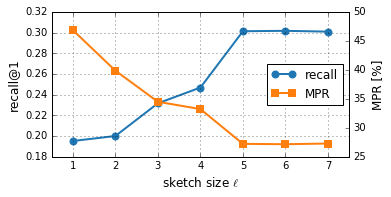

In [37]:
recalls, MPRs = [], []
ell_bound = 7

for ell in range(1, ell_bound + 1):
    res = parse_result('../results/chiir-2017/click/sketch/ell_%d.tsv' % ell, window_size=3000, at=1, n_item=5)
    recalls.append(res['recall'])
    MPRs.append(res['MPR'])

fig, ax1 = plt.subplots()

x = range(1, ell_bound + 1)
l1 = ax1.plot(x, recalls, c=colors[0], label='recall', lw=2., ms=8., marker='o', mew=0.)
ax1.set_ylabel('recall@1')

ax2 = ax1.twinx()
l2 = ax2.plot(x, MPRs, c=colors[2], label='MPR', lw=2., ms=8., marker='s', mew=0.)
ax2.set_ylabel('MPR [%]')

lines = l1 + l2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=5)

ax1.set_xlabel(r'sketch size $\ell$')
ax1.grid()
ax1.set_xlim(0.5, 7.5)

fig.set_size_inches((5.5, 2.8))
fig.patch.set_alpha(0.0)

plt.tight_layout()

### ML100k

- Number of contextual dimensisons = 73
- int(sqrt(73)) = 8

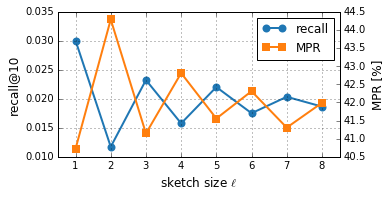

In [156]:
recalls, MPRs = [], []
ell_bound = 8

for ell in range(1, ell_bound + 1):
    res = parse_result('../results/chiir-2017/ML100k/sketch/ell_%d.tsv' % ell, window_size=3000, at=10, n_item=1172)
    recalls.append(res['recall'])
    MPRs.append(res['MPR'])

fig, ax1 = plt.subplots()

x = range(1, ell_bound + 1)
l1 = ax1.plot(x, recalls, c=colors[0], label='recall', lw=2., ms=8., marker='o', mew=0.)
#ax1.set_ylim(0.028, 0.032)
#ax1.set_yticks([0.028, 0.029, 0.030, 0.031, 0.032])
ax1.set_ylabel('recall@10')

ax2 = ax1.twinx()
l2 = ax2.plot(x, MPRs, c=colors[2], label='MPR', lw=2., ms=8., marker='s', mew=0.)
#ax2.set_ylim(46.5, 48.5)
#ax2.set_yticks([46.5, 47.0, 47.5, 48.0, 48.5])
ax2.set_ylabel('MPR [%]')

lines = l1 + l2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=1)

ax1.set_xlabel(r'sketch size $\ell$')
ax1.grid()
ax1.set_xlim(0.5, 8.5)

fig.set_size_inches((5.5, 2.8))
fig.patch.set_alpha(0.0)

plt.tight_layout()

## Plot for the paper

### Accumulated proportion

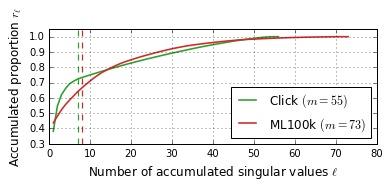

In [32]:
# plt.title('Accumulated proportion of singular values on 20% training samples')

# 56 dim (1 for dummy of the contextual features)
click_prop = [0.381971981704, 0.546284821602, 0.621121482032, 0.661482644135, 0.692863571631, 0.709665604342, 0.723779423266, 0.733151775123, 0.741772475503, 0.750155233554, 0.758425399593, 0.766618399214, 0.774682688935, 0.782600269887, 0.790443637478, 0.798263541756, 0.805993902925, 0.813493867995, 0.820745706601, 0.827778548312, 0.834735258118, 0.841582018256, 0.848335804678, 0.854952483089, 0.86139882369, 0.867782819679, 0.874102235179, 0.880329941292, 0.886416628928, 0.892384370528, 0.898317042528, 0.904226176339, 0.910049833063, 0.915820381224, 0.921529989812, 0.9271159204, 0.932482863888, 0.937722748297, 0.942781388409, 0.947632710882, 0.952358210578, 0.95705864481, 0.961691675925, 0.966273379831, 0.970790833433, 0.97474257885, 0.978636359749, 0.982420020313, 0.985870968126, 0.989262097943, 0.992490576165, 0.995589577706, 0.998078021573, 1.0, 1.0, 1.0]
plt.plot(range(1, 57), click_prop, c=colors[4], lw=1.6, label=r'Click $(m=55)$')
plt.axvline(x=7, c=colors[4], ls='dashed', lw=1.2)

# 73 dim
ML100k_prop = [0.43665702472, 0.48111990136, 0.522063423707, 0.557024529152, 0.58638211013, 0.614150139378, 0.641512790886, 0.66576634166, 0.688824789183, 0.710627008839, 0.731852772048, 0.750394439021, 0.767809156949, 0.781979601421, 0.795590632462, 0.808221628582, 0.82011152284, 0.830911064475, 0.840217901401, 0.848984995381, 0.857456626181, 0.865782760206, 0.873638829126, 0.881003017202, 0.888195429305, 0.895319353163, 0.902148887404, 0.908620725398, 0.914989021207, 0.921192977689, 0.92660813949, 0.93184858349, 0.936893280735, 0.941415376225, 0.945331960689, 0.948871060074, 0.952350090879, 0.955672996169, 0.958959133954, 0.962010743565, 0.96491846448, 0.967759984729, 0.970461519942, 0.973027196709, 0.975538327403, 0.977881010238, 0.979722354951, 0.981436157255, 0.982917911957, 0.984251160819, 0.985563979724, 0.986793709196, 0.987975500702, 0.989147750303, 0.990265917797, 0.991371269923, 0.992301519288, 0.993182487245, 0.99400229264, 0.994790741388, 0.995525110415, 0.99623063609, 0.996837680904, 0.997373673672, 0.997852948706, 0.998322162164, 0.99875705442, 0.999188993173, 0.999548959193, 0.999833149551, 0.999993798273, 1.0, 1.0]
plt.plot(range(1, 74), ML100k_prop, c=colors[6], lw=1.6, label=r'ML100k $(m=73)$')
plt.axvline(x=8, c=colors[6], ls='dashed', lw=1.2)

plt.xlabel(r'Number of accumulated singular values $\ell$')
plt.ylabel(r'Accumulated proportion $r_{\ell}$')
plt.ylim([0.3, 1.05])

plt.legend(loc=4)
plt.grid()

fig = plt.gcf()
fig.set_size_inches((5.5, 2.5))
fig.patch.set_alpha(0.0)

plt.tight_layout()

fig.savefig('../../../paper/images/thesis/sketch_proportion.eps')

### Top-1 scores on ML100k

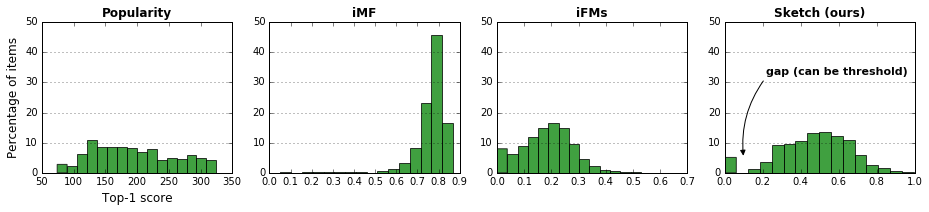

In [38]:
for i, (t, scores) in enumerate(zip(['Popularity', 'iMF', 'iFMs', 'Sketch (ours)'], [top1_popular, top1_iMF, top1_iFMs, top1_sketch])):
    plt.subplot(1, 4, i + 1)
    plt.hist(scores, bins=16, 
             weights=(np.zeros_like(scores) + 1. / len(scores))*100, 
             facecolor='g', alpha=0.75)
    
    ax = plt.gca()
    if i == 0:
        ax.set_xlabel('Top-1 score')
        ax.set_ylabel('Percentage of items')
    ax.yaxis.grid()
    ax.set_title(t, fontweight='bold')
    
    ax.set_ylim([0, 50])

plt.subplot(1, 4, 4)
plt.annotate(r'gap (can be threshold)', 
             xy=(0.1, 5), xytext=(0.22, 32.5), size=11, color='k', fontweight='bold',
             arrowprops=dict(color='k', 
                             lw=1., 
                             arrowstyle='-|>',
                             connectionstyle='arc3,rad=0.2',
                             relpos=(0., 0.)))
    
fig = plt.gcf()
fig.set_size_inches((13, 3))
fig.patch.set_alpha(0.0)

plt.tight_layout()

fig.savefig('../../../paper/images/chiir-2017/ml100k_top1.eps')

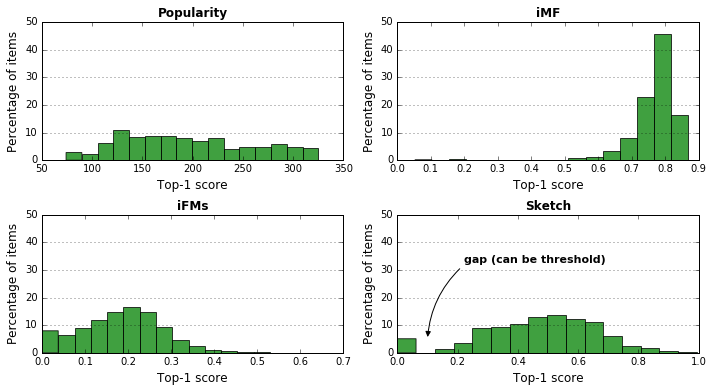

In [34]:
for i, (t, scores) in enumerate(zip(['Popularity', 'iMF', 'iFMs', 'Sketch'], [top1_popular, top1_iMF, top1_iFMs, top1_sketch])):
    plt.subplot(2, 2, i + 1)
    plt.hist(scores, bins=16, 
             weights=(np.zeros_like(scores) + 1. / len(scores))*100, 
             facecolor='g', alpha=0.75)
    
    ax = plt.gca()
    ax.set_xlabel('Top-1 score')
    ax.set_ylabel('Percentage of items')
    ax.yaxis.grid()
    ax.set_title(t, fontweight='bold')
    
    ax.set_ylim([0, 50])

plt.subplot(2, 2, 4)
plt.annotate(r'gap (can be threshold)', 
             xy=(0.1, 5), xytext=(0.22, 32.5), size=11, color='k', fontweight='bold',
             arrowprops=dict(color='k', 
                             lw=1., 
                             arrowstyle='-|>',
                             connectionstyle='arc3,rad=0.2',
                             relpos=(0., 0.)))
    
fig = plt.gcf()
fig.set_size_inches((10, 5.5))
fig.patch.set_alpha(0.0)

plt.tight_layout()

fig.savefig('../../../paper/images/thesis/ml100k_top1.eps')

### Different sketch and recoomendation size

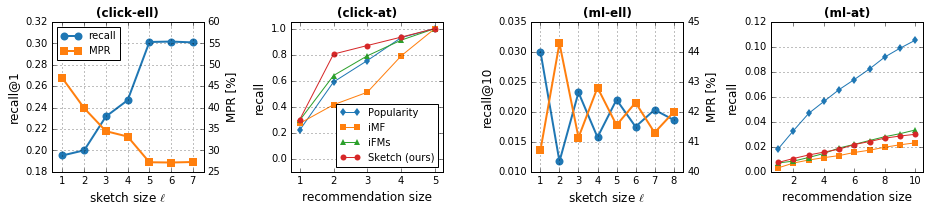

In [252]:
### 1: ell on click
recalls, MPRs = [], []
ell_bound = 7

for ell in range(1, ell_bound + 1):
    res = parse_result('../results/chiir-2017/click/sketch/ell_%d.tsv' % ell, window_size=3000, at=1, n_item=5)
    recalls.append(res['recall'])
    MPRs.append(res['MPR'])

plt.subplot(1, 4, 1)
plt.title('(click-ell)', fontweight='bold')

ax1 = plt.gca()
x = range(1, ell_bound + 1)
l1 = ax1.plot(x, recalls, c=colors[0], label='recall', lw=2., ms=8., marker='o', mew=0.)
ax1.set_ylabel('recall@1')
ax1.legend(lines, labels, loc=2, fontsize=10)

ax2 = ax1.twinx()
l2 = ax2.plot(x, MPRs, c=colors[2], label='MPR', lw=2., ms=8., marker='s', mew=0.)
ax2.set_ylabel('MPR [%]')
ax2.set_ylim([25, 60])
ax2.set_yticks([25, 30, 35, 40, 45, 50, 55, 60])

lines = l1 + l2
labels = [l.get_label() for l in lines]

ax1.set_xlabel(r'sketch size $\ell$')
ax1.grid()
ax1.set_xlim(0.5, 7.5)

### 2: @ on click
popular = []
iMF = []
iFMs = []
sketch = []
at_max = 5
n_item = 5

for at in range(1, at_max + 1):
    res = parse_result('../results/chiir-2017/click/popular.tsv', window_size=3000, at=at, n_item=n_item)
    popular.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/click/iMF.tsv', window_size=3000, at=at, n_item=n_item)
    iMF.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/click/iFMs.tsv', window_size=3000, at=at, n_item=n_item)
    iFMs.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/click/sketch/ell_7.tsv', window_size=3000, at=at, n_item=n_item)
    sketch.append(res['recall'])
    
plt.subplot(1, 4, 2)
plt.title('(click-at)', fontweight='bold')
plt.plot(range(1, at_max + 1), popular, c=colors[0], marker='d', mew=0.0, label='Popularity')
plt.plot(range(1, at_max + 1), iMF, c=colors[2], marker='s', mew=0.0, label='iMF')
plt.plot(range(1, at_max + 1), iFMs, c=colors[4], marker='^', mew=0.0, label='iFMs')
plt.plot(range(1, at_max + 1), sketch, c=colors[6], marker='o', mew=0.0, label='Sketch (ours)')
plt.legend(loc=4, fontsize=10)
ax = plt.gca()
ax.yaxis.grid()
ax.set_xlim([0.75, 5.25])
ax.set_ylim([-0.099, 1.05])
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel('recommendation size')
ax.set_ylabel('recall')


### 3: ell on ML100k
recalls, MPRs = [], []
ell_bound = 8

for ell in range(1, ell_bound + 1):
    res = parse_result('../results/chiir-2017/ML100k/sketch/ell_%d.tsv' % ell, window_size=3000, at=10, n_item=1172)
    recalls.append(res['recall'])
    MPRs.append(res['MPR'])

plt.subplot(1, 4, 3)
plt.title('(ml-ell)', fontweight='bold')

ax1 = plt.gca()
x = range(1, ell_bound + 1)
l1 = ax1.plot(x, recalls, c=colors[0], label='recall', lw=2., ms=8., marker='o', mew=0.)
ax1.set_ylabel('recall@10')

ax2 = ax1.twinx()
l2 = ax2.plot(x, MPRs, c=colors[2], label='MPR', lw=2., ms=8., marker='s', mew=0.)
ax2.set_ylabel('MPR [%]')
ax2.set_ylim([40, 45])
ax2.set_yticks([40, 41, 42, 43, 44, 45])

lines = l1 + l2
labels = [l.get_label() for l in lines]

ax1.set_xlabel(r'sketch size $\ell$')
ax1.grid()
ax1.set_xlim(0.5, 8.5)


### 4: @ on ML100k
popular = []
iMF = []
iFMs = []
sketch = []
at_max = 10
n_item = 1172

for at in range(1, at_max + 1):
    res = parse_result('../results/chiir-2017/ML100k/popular.tsv', window_size=3000, at=at, n_item=n_item)
    popular.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/iMF.tsv', window_size=3000, at=at, n_item=n_item)
    iMF.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/iFMs.tsv', window_size=3000, at=at, n_item=n_item)
    iFMs.append(res['recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/sketch/ell_1.tsv', window_size=3000, at=at, n_item=n_item)
    sketch.append(res['recall'])

plt.subplot(1, 4, 4)
plt.title('(ml-at)', fontweight='bold')
plt.plot(range(1, at_max + 1), popular, c=colors[0], marker='d', mew=0.0, label='Popularity')
plt.plot(range(1, at_max + 1), iMF, c=colors[2], marker='s', mew=0.0, label='iMF')
plt.plot(range(1, at_max + 1), iFMs, c=colors[4], marker='^', mew=0.0, label='iFMs')
plt.plot(range(1, at_max + 1), sketch, c=colors[6], marker='o', mew=0.0, label='Sketch (ours)')
ax = plt.gca()
ax.yaxis.grid()
ax.set_xlabel('recommendation size')
ax.set_ylabel('recall')
ax.set_xlim([0.5, 10.5])

fig = plt.gcf()
fig.set_size_inches((13, 3))
fig.patch.set_alpha(0.0)
plt.tight_layout()

fig.savefig('../../../paper/images/chiir-2017/different_settings.eps')

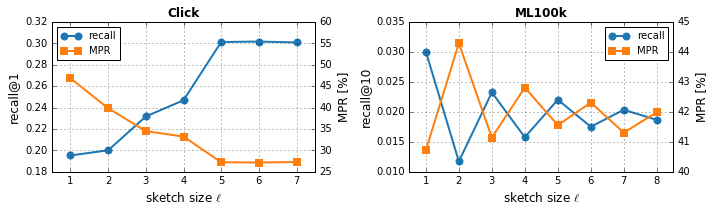

In [277]:
### 1: ell on click
recalls, MPRs = [], []
ell_bound = 7

for ell in range(1, ell_bound + 1):
    res = parse_result('../results/chiir-2017/click/sketch/ell_%d.tsv' % ell, window_size=3000, at=1, n_item=5)
    recalls.append(res['static_recall'])
    MPRs.append(res['static_mpr'])

plt.subplot(1, 2, 1)
plt.title('Click', fontweight='bold')

ax1 = plt.gca()
x = range(1, ell_bound + 1)
l1 = ax1.plot(x, recalls, c=colors[0], label='recall', lw=2., ms=8., marker='o', mew=0.)
ax1.set_ylabel('recall@1')

ax2 = ax1.twinx()
l2 = ax2.plot(x, MPRs, c=colors[2], label='MPR', lw=2., ms=8., marker='s', mew=0.)
ax2.set_ylabel('MPR [%]')
ax2.set_ylim([25, 60])
ax2.set_yticks([25, 30, 35, 40, 45, 50, 55, 60])

lines = l1 + l2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=2, fontsize=10)

ax1.set_xlabel(r'sketch size $\ell$')
ax1.grid()
ax1.set_xlim(0.5, 7.5)

### 3: ell on ML100k
recalls, MPRs = [], []
ell_bound = 8

for ell in range(1, ell_bound + 1):
    res = parse_result('../results/chiir-2017/ML100k/sketch/ell_%d.tsv' % ell, window_size=3000, at=10, n_item=1172)
    recalls.append(res['static_recall'])
    MPRs.append(res['static_mpr'])

plt.subplot(1, 2, 2)
plt.title('ML100k', fontweight='bold')

ax1 = plt.gca()
x = range(1, ell_bound + 1)
l1 = ax1.plot(x, recalls, c=colors[0], label='recall', lw=2., ms=8., marker='o', mew=0.)
ax1.set_ylabel('recall@10')

ax2 = ax1.twinx()
l2 = ax2.plot(x, MPRs, c=colors[2], label='MPR', lw=2., ms=8., marker='s', mew=0.)
ax2.set_ylabel('MPR [%]')
ax2.set_ylim([40, 45])
ax2.set_yticks([40, 41, 42, 43, 44, 45])

lines = l1 + l2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=1, fontsize=10)

ax1.set_xlabel(r'sketch size $\ell$')
ax1.grid()
ax1.set_xlim(0.5, 8.5)

fig = plt.gcf()
fig.set_size_inches((10, 3))
fig.patch.set_alpha(0.0)
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/different_ell.eps')

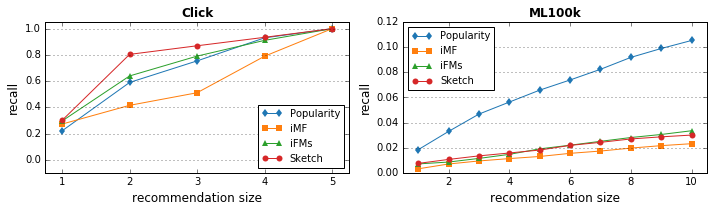

In [278]:
### 2: @ on click
popular = []
iMF = []
iFMs = []
sketch = []
at_max = 5
n_item = 5

for at in range(1, at_max + 1):
    res = parse_result('../results/chiir-2017/click/popular.tsv', window_size=3000, at=at, n_item=n_item)
    popular.append(res['static_recall'])
    
    res = parse_result('../results/chiir-2017/click/iMF.tsv', window_size=3000, at=at, n_item=n_item)
    iMF.append(res['static_recall'])
    
    res = parse_result('../results/chiir-2017/click/iFMs.tsv', window_size=3000, at=at, n_item=n_item)
    iFMs.append(res['static_recall'])
    
    res = parse_result('../results/chiir-2017/click/sketch/ell_7.tsv', window_size=3000, at=at, n_item=n_item)
    sketch.append(res['static_recall'])
    
plt.subplot(1, 2, 1)
plt.title('Click', fontweight='bold')
plt.plot(range(1, at_max + 1), popular, c=colors[0], marker='d', mew=0.0, label='Popularity')
plt.plot(range(1, at_max + 1), iMF, c=colors[2], marker='s', mew=0.0, label='iMF')
plt.plot(range(1, at_max + 1), iFMs, c=colors[4], marker='^', mew=0.0, label='iFMs')
plt.plot(range(1, at_max + 1), sketch, c=colors[6], marker='o', mew=0.0, label='Sketch')
plt.legend(loc=4, fontsize=10)
ax = plt.gca()
ax.yaxis.grid()
ax.set_xlim([0.75, 5.25])
ax.set_ylim([-0.099, 1.05])
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel('recommendation size')
ax.set_ylabel('recall')

### 4: @ on ML100k
popular = []
iMF = []
iFMs = []
sketch = []
at_max = 10
n_item = 1172

for at in range(1, at_max + 1):
    res = parse_result('../results/chiir-2017/ML100k/popular.tsv', window_size=3000, at=at, n_item=n_item)
    popular.append(res['static_recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/iMF.tsv', window_size=3000, at=at, n_item=n_item)
    iMF.append(res['static_recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/iFMs.tsv', window_size=3000, at=at, n_item=n_item)
    iFMs.append(res['static_recall'])
    
    res = parse_result('../results/chiir-2017/ML100k/sketch/ell_1.tsv', window_size=3000, at=at, n_item=n_item)
    sketch.append(res['static_recall'])

plt.subplot(1, 2, 2)
plt.title('ML100k', fontweight='bold')
plt.plot(range(1, at_max + 1), popular, c=colors[0], marker='d', mew=0.0, label='Popularity')
plt.plot(range(1, at_max + 1), iMF, c=colors[2], marker='s', mew=0.0, label='iMF')
plt.plot(range(1, at_max + 1), iFMs, c=colors[4], marker='^', mew=0.0, label='iFMs')
plt.plot(range(1, at_max + 1), sketch, c=colors[6], marker='o', mew=0.0, label='Sketch')
plt.legend(loc=2, fontsize=10)
ax = plt.gca()
ax.yaxis.grid()
ax.set_xlabel('recommendation size')
ax.set_ylabel('recall')
ax.set_xlim([0.5, 10.5])

fig = plt.gcf()
fig.set_size_inches((10, 3))
fig.patch.set_alpha(0.0)
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/different_at.eps')

## Plot singular values

### Click

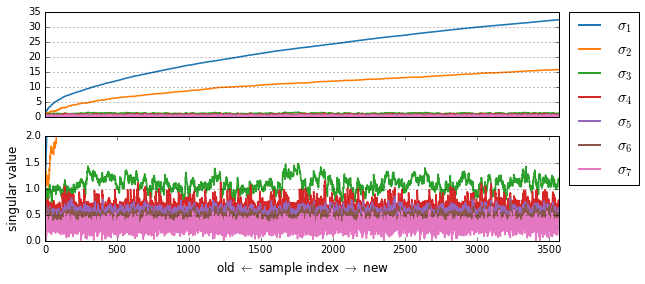

In [57]:
with open('../results/singular-values/click.txt') as f:
    singular_values = np.array([[float(s) for s in l.rstrip().split('\t')] for l in f.readlines()])
    
for i in [1, 2]:
    plt.subplot(2, 1, i)
    ax = plt.gca()    

    ell = singular_values.shape[1]
    for e in range(ell):
        ax.plot(singular_values[:, e], c=colors[2 * e], label=r'$\sigma_{%d}$' % (e + 1), lw=1.6)

    ax.yaxis.grid()
    ax.set_xlim((0, exp_click.data.n_sample - 1))

    if i == 1:
        l = legend = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=15)
        for h in legend.legendHandles:
            h.set_linewidth(2.0)
        ax.set_xticks([])
    elif i == 2:
        ax.set_ylim((0., 2))
        ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
        ax.set_ylabel('singular value')

fig = plt.gcf()
fig.set_size_inches((8, 4))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/click_B_singular_values.eps', bbox_extra_artists=(l,), bbox_inches='tight')

### ML100k

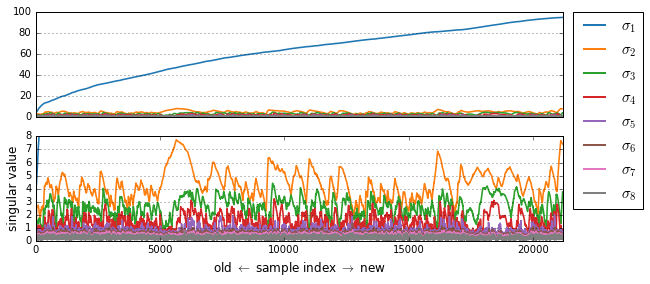

In [58]:
with open('../results/singular-values/ML100k.txt') as f:    
    singular_values = np.array([[float(s) for s in l.rstrip().split('  ')] for l in f.readlines()])
    
for i in [1, 2]:
    plt.subplot(2, 1, i)
    ax = plt.gca()    

    ell = singular_values.shape[1]
    for e in range(ell):
        ax.plot(singular_values[:, e], c=colors[2 * e], label=r'$\sigma_{%d}$' % (e + 1), lw=1.6)

    ax.yaxis.grid()
    ax.set_xlim((0, exp_ML100k.data.n_sample - 1))

    if i == 1:
        l = legend = ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=15)
        for h in legend.legendHandles:
            h.set_linewidth(2.0)
        ax.set_xticks([])
    elif i == 2:
        ax.set_ylim((0., 8))
        ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
        ax.set_ylabel('singular value')

fig = plt.gcf()
fig.set_size_inches((8, 4))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/ML100k_B_singular_values.eps', bbox_extra_artists=(l,), bbox_inches='tight')

## Plot regularization parameters

### Click

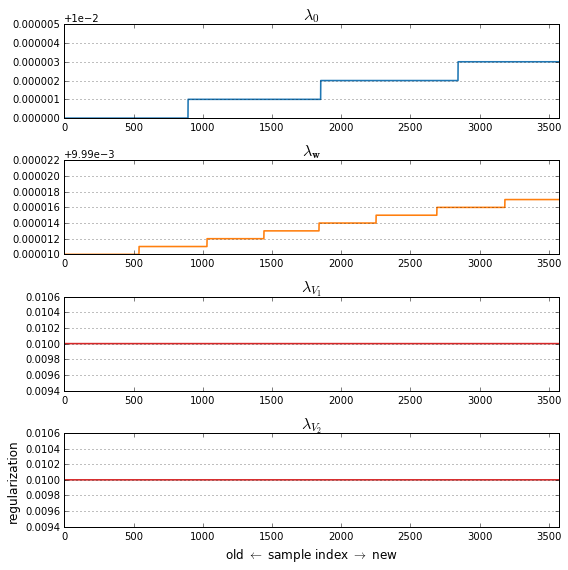

In [99]:
with open('../results/adaptive-reg/click.txt') as f:    
    regs = np.array([[float(s) for s in l.rstrip().split('\t')] for l in f.readlines()])
    
plt.subplot(4, 1, 1)
plt.title(r'$\lambda_{0}$', fontsize=16)
ax = plt.gca()
ax.plot(regs[:, 0], c=colors[0], label=r'$\lambda_{0}$', lw=1.6)
ax.yaxis.grid()
ax.set_xlim((0, exp_click.data.n_sample - 1))

plt.subplot(4, 1, 2)
plt.title(r'$\lambda_{\mathbf{w}}$', fontsize=16)
ax = plt.gca()
ax.plot(regs[:, 1], c=colors[2], label=r'$\lambda_{\mathbf{w}}$', lw=1.6)
ax.yaxis.grid()
ax.set_xlim((0, exp_click.data.n_sample - 1))
    
k = 2
for ki in range(k):
    i = 2 + ki
    plt.subplot(4, 1, i + 1)
    plt.title(r'$\lambda_{V_{%d}}$' % (ki + 1), fontsize=16)
    ax = plt.gca()
    ax.plot(regs[:, i], c=colors[6], label=r'$\lambda_{V_{%d}}$' % (ki + 1), lw=1.6)
    ax.yaxis.grid()
    ax.set_xlim((0, exp_click.data.n_sample - 1))

ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
ax.set_ylabel('regularization')

fig = plt.gcf()
fig.set_size_inches((8, 8))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/click_adaptive_reg.eps')

### ML100k

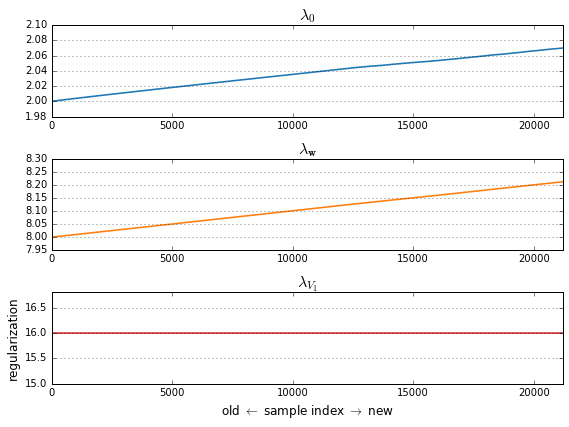

In [100]:
with open('../results/adaptive-reg/ML100k.txt') as f:    
    regs = np.array([[float(s) for s in l.rstrip().split('\t')] for l in f.readlines()])

plt.subplot(3, 1, 1)
plt.title(r'$\lambda_{0}$', fontsize=16)
ax = plt.gca()
ax.plot(regs[:, 0], c=colors[0], label=r'$\lambda_{0}$', lw=1.6)
ax.yaxis.grid()
ax.set_xlim((0, exp_ML100k.data.n_sample - 1))

plt.subplot(3, 1, 2)
plt.title(r'$\lambda_{\mathbf{w}}$', fontsize=16)
ax = plt.gca()
ax.plot(regs[:, 1], c=colors[2], label=r'$\lambda_{\mathbf{w}}$', lw=1.6)
ax.yaxis.grid()
ax.set_xlim((0, exp_ML100k.data.n_sample - 1))

plt.subplot(3, 1, 3)
plt.title(r'$\lambda_{V_1}$', fontsize=16)
ax = plt.gca()
ax.plot(regs[:, 2], c=colors[6], label=r'$\lambda_{V_1}$', lw=1.6)
ax.yaxis.grid()
ax.set_xlim((0, exp_ML100k.data.n_sample - 1))

ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
ax.set_ylabel('regularization')

fig = plt.gcf()
fig.set_size_inches((8, 6))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/ML100k_adaptive_reg.eps')

## Plot accuracy behavior on different metrics

In [254]:
def plot_results(data, window_size, n_item, at):
    metrics = ['Recall', 'Precision', 'MAP', 'AUC', 'MRR', 'MPR', 'NDCG']
     
    for method, color in [('popular', 14), ('iMF', 0), ('iFMs', 6), ('sketch', 4)]:
        res = parse_result('../results/chiir-2017/%s/%s.tsv' % (data, method), 
                           window_size=window_size, 
                           n_item=n_item, 
                           at=at)
        
        for i, metric in enumerate(metrics):
            plt.subplot(4, 2, i + 1)
            plt.plot(res[metric.lower()], c=colors[color], lw=1.6, label=method)
            plt.title(metric, fontweight='bold')

            ax = plt.gca()
            ax.set_ylabel(metric)

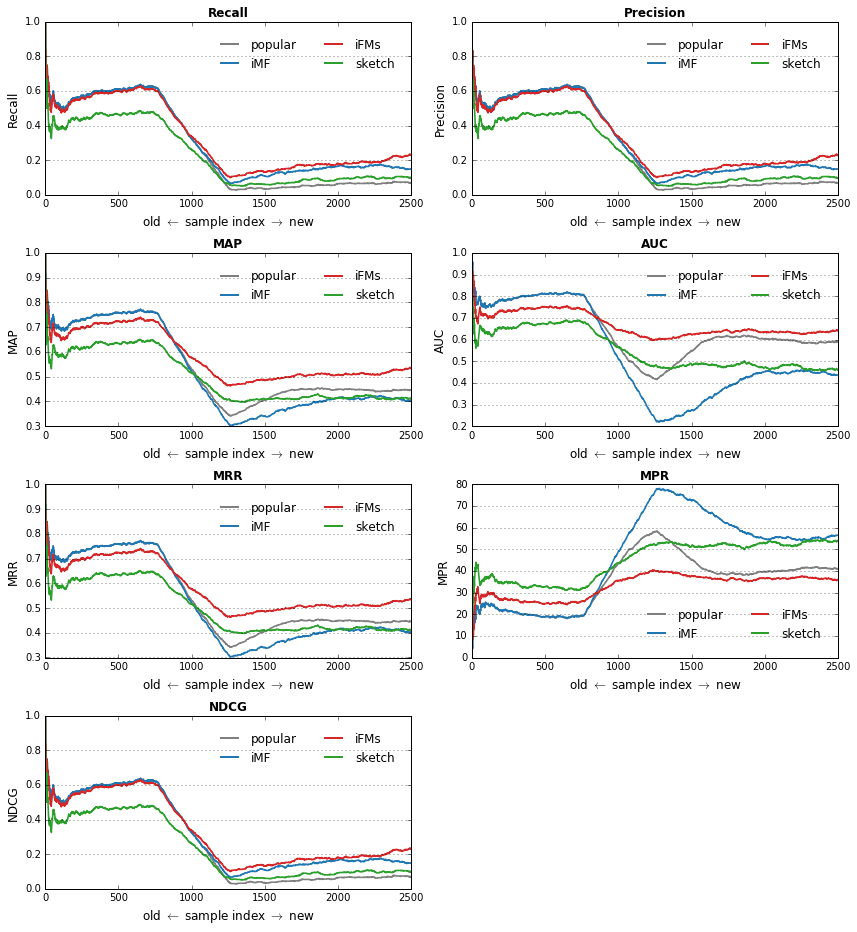

In [268]:
plot_results('click', 500, 5, 1)

for i in range(1, 8):
    plt.subplot(4, 2, i)
    ax = plt.gca()
    ax.yaxis.grid()
    ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
    
    loc = 1 if i != 6 else 4
    legend = ax.legend(loc=loc, ncol=2, borderaxespad=1., frameon=False)
    for h in legend.legendHandles:
        h.set_linewidth(2.0)

fig = plt.gcf()
fig.set_size_inches((12, 13))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/click_behaviors.eps')

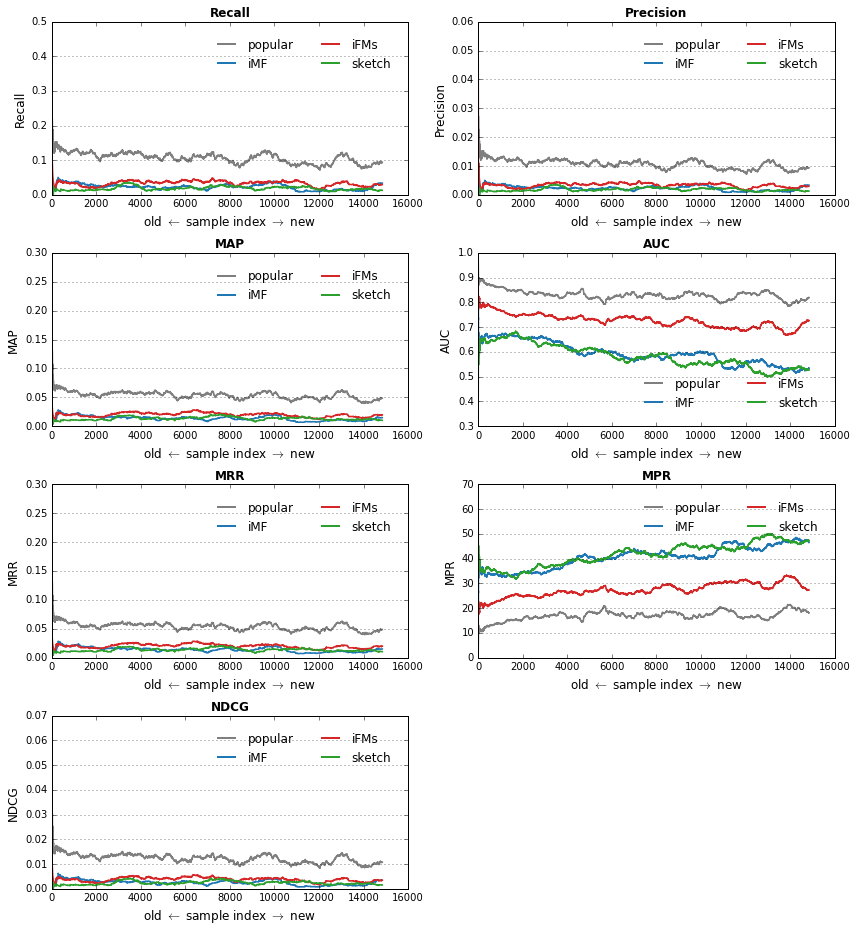

In [262]:
plot_results('ML100k', 1000, exp_ML100k.data.n_item, 10)

for i in range(1, 8):
    plt.subplot(4, 2, i)
    ax = plt.gca()
    ax.yaxis.grid()
    ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
    
    loc = 1 if i != 4 else 4
    legend = ax.legend(loc=loc, ncol=2, borderaxespad=1., frameon=False)
    for h in legend.legendHandles:
        h.set_linewidth(2.0)

fig = plt.gcf()
fig.set_size_inches((12, 13))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/ML100k_behaviors.eps')

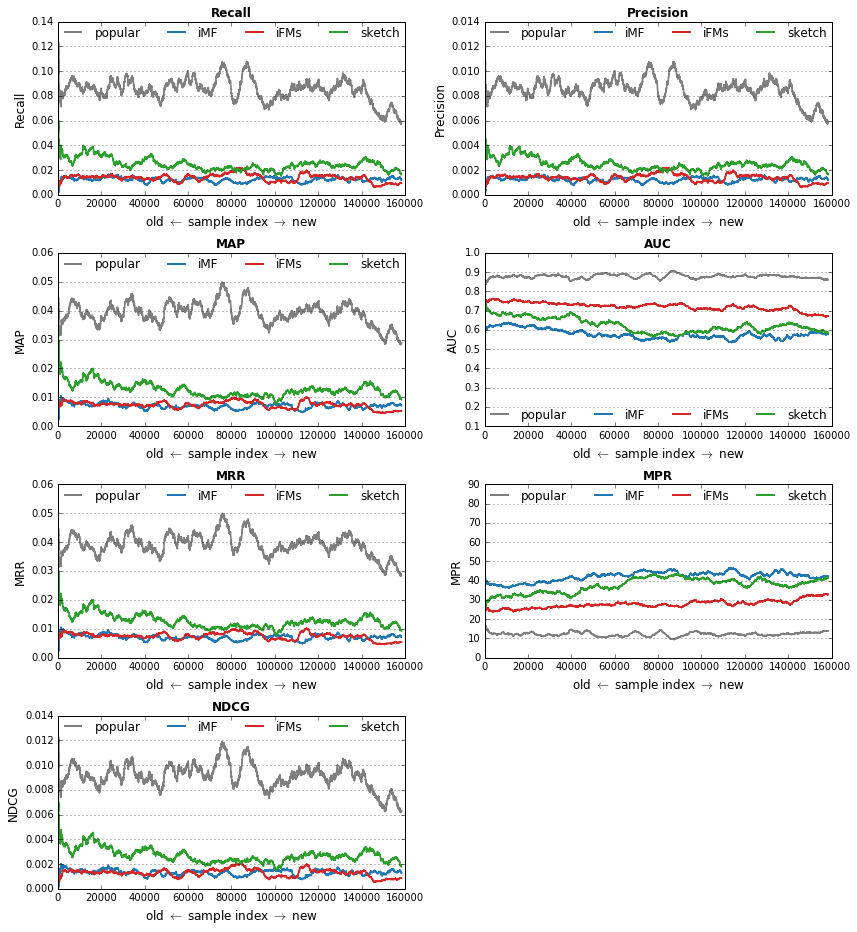

In [269]:
plot_results('ML1M', 5000, exp_ML1M.data.n_item, 10)

for i in range(1, 8):
    plt.subplot(4, 2, i)
    ax = plt.gca()
    ax.yaxis.grid()
    ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
    
    loc = 1 if i != 4 else 4
    legend = ax.legend(loc=loc, ncol=4, borderaxespad=0., frameon=False)
    for h in legend.legendHandles:
        h.set_linewidth(2.0)

fig = plt.gcf()
fig.set_size_inches((12, 13))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/ML1M_behaviors.eps')

## Different window sizes

In [296]:
def plot_results_window(data, n_item, at, window_sizes):
    metrics = ['Recall', 'Precision', 'MAP', 'AUC', 'MRR', 'MPR', 'NDCG']
     
    for method, color in [('popular', 14), ('iMF', 0), ('iFMs', 6), ('sketch', 4)]:
        for i, window_size in enumerate(window_sizes):
            res = parse_result('../results/chiir-2017/%s/%s.tsv' % (data, method), 
                               window_size=window_size, 
                               n_item=n_item, 
                               at=at)
            
            plt.subplot(2, 2, i + 1)
            plt.plot(res['recall'], c=colors[color], lw=1.6, label=method)
            plt.title('window size = %d' % window_size, fontweight='bold')

            ax = plt.gca()
            ax.set_ylabel('Recall')

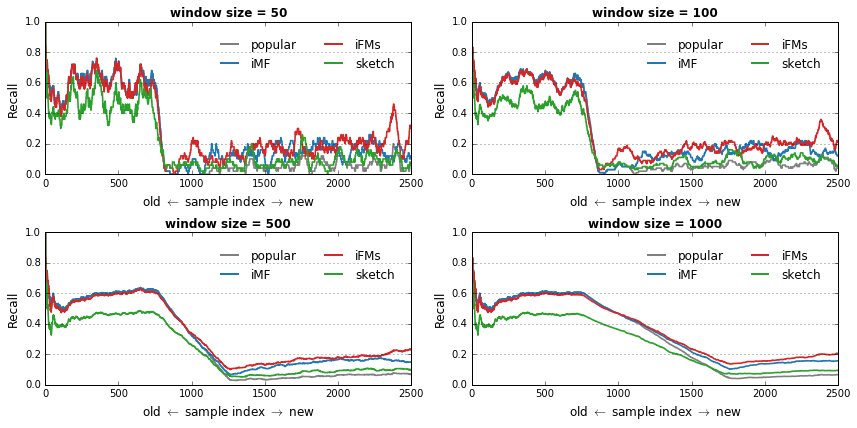

In [305]:
plot_results_window('click', 5, 1, [50, 100, 500, 1000])

for i in range(1, 5):
    plt.subplot(2, 2, i)
    ax = plt.gca()
    ax.yaxis.grid()
    ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
    
    legend = ax.legend(loc=loc, ncol=2, borderaxespad=1., frameon=False)
    for h in legend.legendHandles:
        h.set_linewidth(2.0)

fig = plt.gcf()
fig.set_size_inches((12, 6))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/click_different_window.eps')

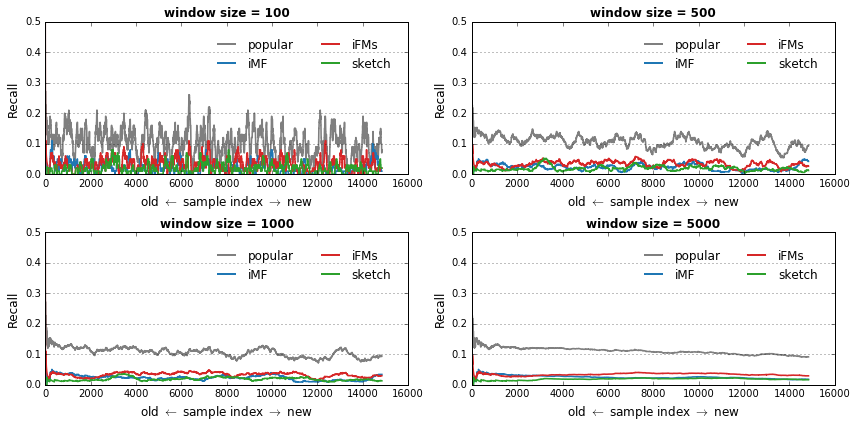

In [306]:
plot_results_window('ML100k', exp_ML100k.data.n_item, 10, [100, 500, 1000, 5000])

for i in range(1, 5):
    plt.subplot(2, 2, i)
    ax = plt.gca()
    ax.yaxis.grid()
    ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
    
    legend = ax.legend(loc=loc, ncol=2, borderaxespad=1., frameon=False)
    for h in legend.legendHandles:
        h.set_linewidth(2.0)

fig = plt.gcf()
fig.set_size_inches((12, 6))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/ML100k_different_window.eps')

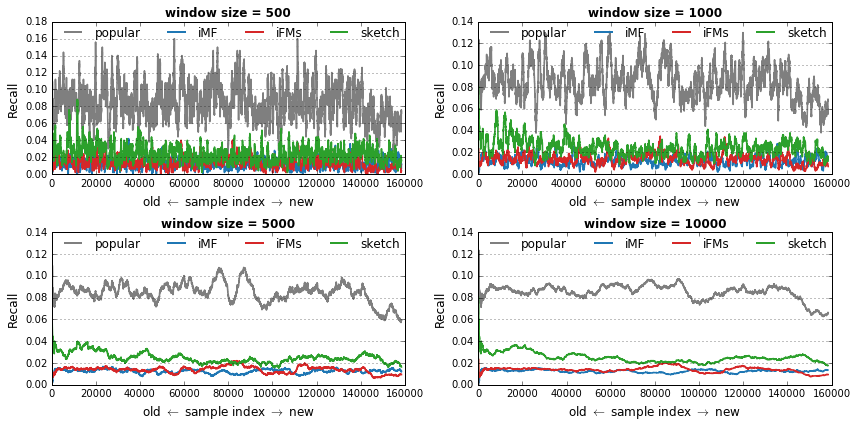

In [307]:
plot_results_window('ML1M', exp_ML1M.data.n_item, 10, [500, 1000, 5000, 10000])

for i in range(1, 5):
    plt.subplot(2, 2, i)
    ax = plt.gca()
    ax.yaxis.grid()
    ax.set_xlabel(r'old $\leftarrow$ sample index $\rightarrow$ new')
    
    legend = ax.legend(loc=loc, ncol=4, borderaxespad=0., frameon=False)
    for h in legend.legendHandles:
        h.set_linewidth(2.0)

fig = plt.gcf()
fig.set_size_inches((12, 6))
plt.tight_layout()

fig.savefig('../../../paper/images/thesis/ML1M_different_window.eps')